In [1]:
!pip install wordsegment
!pip install keras
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 23.9 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/teyang-lau/Disaster_Tweet_Classification/main/Data/train.csv"
test_url = "https://raw.githubusercontent.com/teyang-lau/Disaster_Tweet_Classification/main/Data/test.csv"

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


<Axes: >

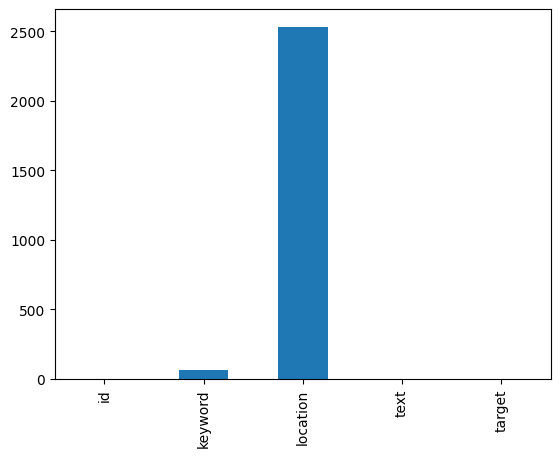

In [4]:
print(train.head())

train.isnull().sum().plot(kind='bar')

<ipython-input-7-7bd6dc476785>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train.target == 1][plot_cols[i]], label='Disaster', color=color[1]).set_title(plot_titles[i])
<ipython-input-7-7bd6dc476785>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train.target == 0][plot_cols

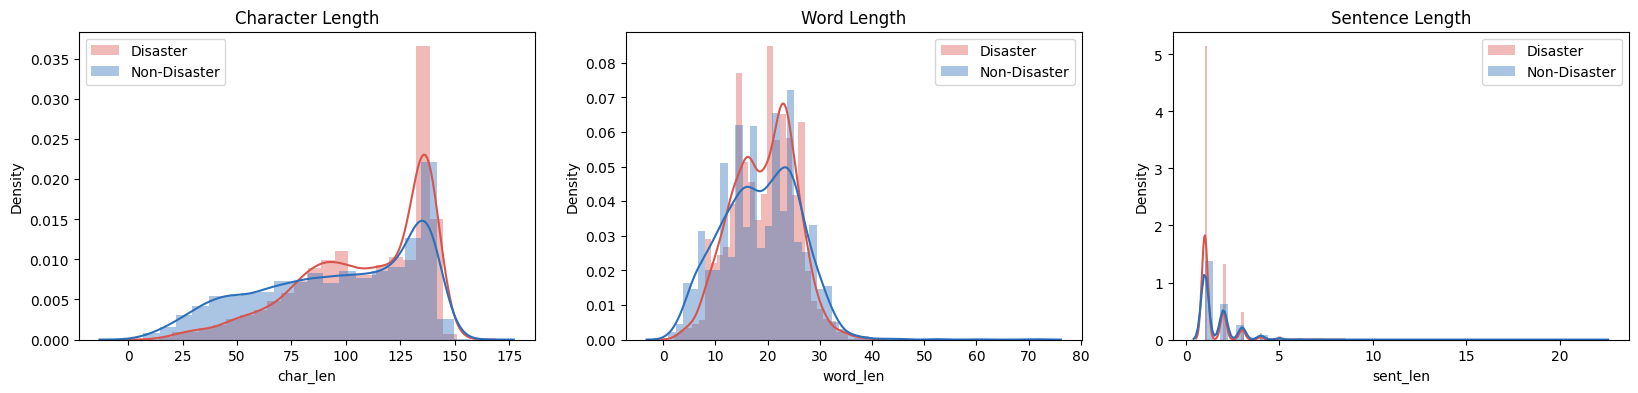

In [7]:
import nltk
#nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize

# count number of characters in each tweet
train['char_len'] = train.text.str.len()

# count number of words in each tweet
word_tokens = [len(word_tokenize(var)) for var in train.text]
train['word_len'] = word_tokens

# count number of sentence in each tweet
sent_tokens = [len(sent_tokenize(var)) for var in train.text]
train['sent_len'] = sent_tokens

plot_cols = ['char_len','word_len','sent_len']
plot_titles = ['Character Length','Word Length','Sentence Length']
color = [sns.xkcd_rgb['medium blue'], sns.xkcd_rgb['pale red']]

plt.figure(figsize=(20,4))
for counter, i in enumerate([0,1,2]):
    plt.subplot(1,3,counter+1)
    sns.distplot(train[train.target == 1][plot_cols[i]], label='Disaster', color=color[1]).set_title(plot_titles[i])
    sns.distplot(train[train.target == 0][plot_cols[i]], label='Non-Disaster', color=color[0])
    plt.legend()

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Text(0.5, 1.0, 'Top Stopwords for  Disaster Tweets')

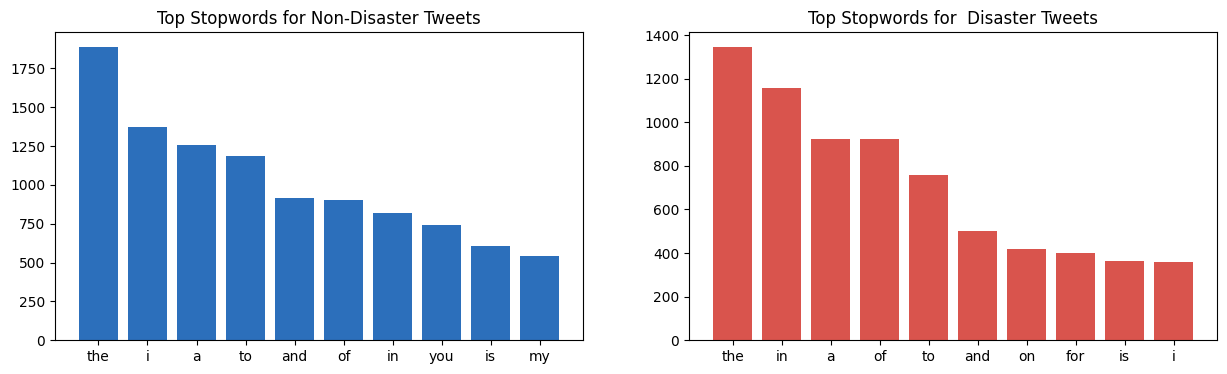

In [10]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# Get all the word tokens in dataframe for Disaster and Non-Disaster
corpus0 = [] # Non-Disaster
[corpus0.append(word.lower()) for var in train[train.target == 0].text for word in word_tokenize(var)]
corpus1 = [] # Disaster
[corpus1.append(word.lower()) for var in train[train.target == 1].text for word in word_tokenize(var)]

# Function for counting top stopwords in a corpus
def count_top_stopwords(corpus):
    stopwords_freq = {}
    for word in corpus:
        if word in stop:
            if word in stopwords_freq:
                stopwords_freq[word] += 1
            else:
                stopwords_freq[word] = 1
    topwords = sorted(stopwords_freq.items(), key=lambda item: item[1], reverse=True)[:10] # get the top 10 stopwords
    x,y = zip(*topwords) # get key and values
    return x,y

x0,y0 = count_top_stopwords(corpus0)
x1,y1 = count_top_stopwords(corpus1)

# Plot bar plot of top stopwords for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Stopwords for Non-Disaster Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Stopwords for  Disaster Tweets')

Text(0.5, 1.0, 'Top Punctuations for Disaster Tweets')

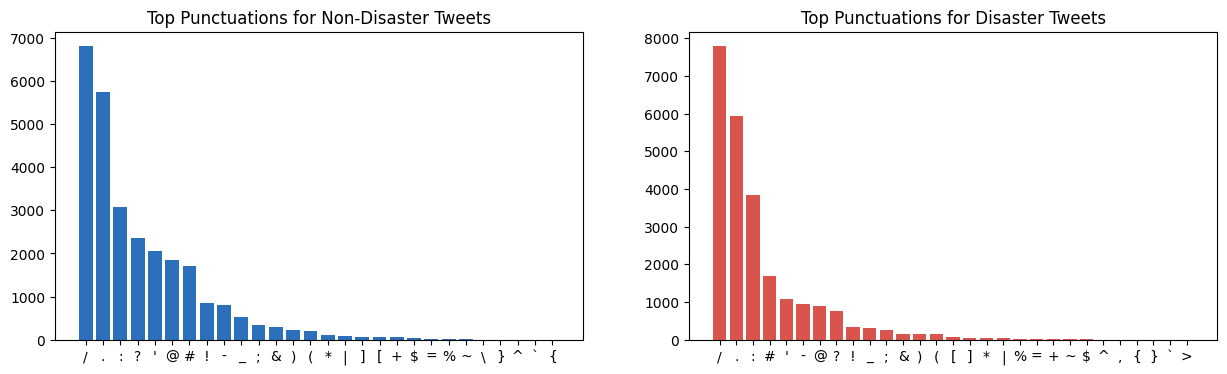

In [11]:
from string import punctuation

# Get all the punctuations in dataframe for Disaster and Non-Disaster
corpus0 = [] # Non-Disaster
[corpus0.append(c) for var in train[train.target == 0].text for c in var]
corpus0 = list(filter(lambda x: x in punctuation, corpus0)) # use filter to select only punctuations
corpus1 = [] # Disaster
[corpus1.append(c) for var in train[train.target == 1].text for c in var]
corpus1 = list(filter(lambda x: x in punctuation, corpus1))

from collections import Counter
x0,y0 = zip(*Counter(corpus0).most_common())
x1,y1 = zip(*Counter(corpus1).most_common())

# Plot bar plot of top punctuations for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Punctuations for Non-Disaster Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Punctuations for Disaster Tweets')



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'news'),
  Text(1, 0, 'disaster'),
  Text(2, 0, 'california'),
  Text(3, 0, 'suicide'),
  Text(4, 0, 'police'),
  Text(5, 0, 'amp'),
  Text(6, 0, 'people'),
  Text(7, 0, 'killed'),
  Text(8, 0, 'like'),
  Text(9, 0, 'hiroshima')])

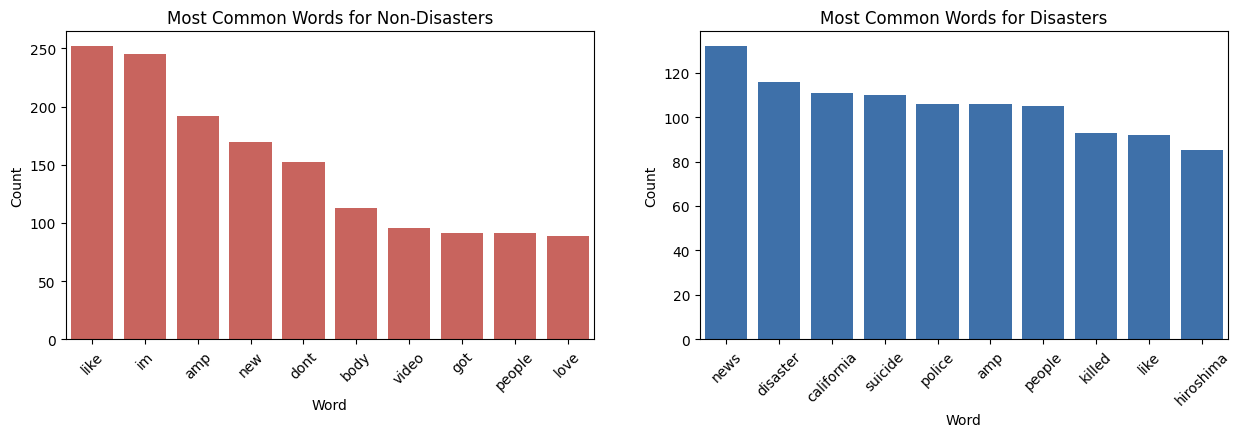

In [12]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop = ENGLISH_STOP_WORDS.union(stop) # combine stop words from different sources

# function for removing url from text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Get all the word tokens in dataframe for Disaster and Non-Disaster
# - remove url, tokenize tweet into words, lowercase words
corpus0 = [] # Non-Disaster
[corpus0.append(word.lower()) for var in train[train.target == 0].text for word in word_tokenize(remove_url(var))]
corpus0 = list(filter(lambda x: x not in stop, corpus0)) # use filter to unselect stopwords

corpus1 = [] # Disaster
[corpus1.append(word.lower()) for var in train[train.target == 1].text for word in word_tokenize(remove_url(var))]
corpus1 = list(filter(lambda x: x not in stop, corpus1)) # use filter to unselect stopwords

# Create df for word counts to use sns plots
a = Counter(corpus0).most_common()
df0 = pd.DataFrame(a, columns=['Word','Count'])

a = Counter(corpus1).most_common()
df1 = pd.DataFrame(a, columns=['Word','Count'])

# Plot for Disaster and Non-Disaster
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Word',y='Count',data=df0.head(10), color=color[1]).set_title('Most Common Words for Non-Disasters')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x='Word',y='Count',data=df1.head(10), color=color[0]).set_title('Most Common Words for Disasters')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Disaster')

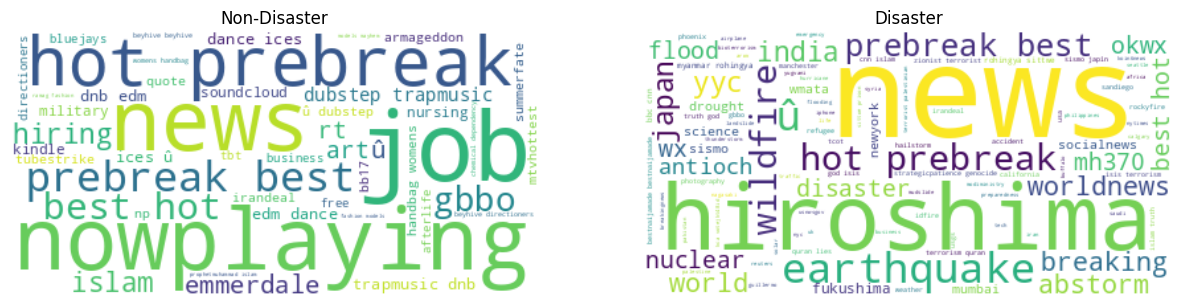

In [13]:
def clean(word):
    for p in punctuation: word = word.replace(p, '')
    return word

from wordcloud import WordCloud

def wc_hash(target):
    hashtag = [clean(w[1:].lower()) for var in train[train.target == target].text for w in var.split() if '#' in w and w[0] == '#']
    hashtag = ' '.join(hashtag)
    my_cloud = WordCloud(background_color='white', stopwords=stop).generate(hashtag)

    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear')
    plt.axis("off")

plt.figure(figsize=(15,4))
wc_hash(0)
plt.title('Non-Disaster')
wc_hash(1)
plt.title('Disaster')

Feature Extraction

In [14]:
import re
from textblob import TextBlob

# polarity and subjectivity
train['polarity'] = [TextBlob(var).sentiment.polarity for var in train.text]
train['subjectivity'] = [TextBlob(var).sentiment.subjectivity for var in train.text]

#############################################################################################################################
# exclaimation and question marks
train['exclaimation_num'] = [var.count('!') for var in train.text]
train['questionmark_num'] = [var.count('?') for var in train.text]

#############################################################################################################################
# count number of hashtags and mentions
# Function for counting number of hashtags and mentions
def count_url_hashtag_mention(text):
    urls_num = len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
    word_tokens = text.split()
    hash_num = len([word for word in word_tokens if word[0] == '#' and word.count('#') == 1]) # only appears once in front of word
    mention_num = len([word for word in word_tokens if word[0] == '@' and word.count('@') == 1]) # only appears once in front of word
    return urls_num, hash_num, mention_num

url_num, hash_num, mention_num = zip(*[count_url_hashtag_mention(var) for var in train.text])
train = train.assign(url_num = url_num, hash_num = hash_num, mention_num = mention_num)

#############################################################################################################################
# count number of contractions
contractions = ["'t", "'re", "'s", "'d", "'ll", "'ve", "'m"]
train['contraction_num'] = [sum([var.count(cont) for cont in contractions]) for var in train.text]

In [15]:
## Replace NaNs with 'None'
train.keyword.fillna('None', inplace=True)

#############################################################################################################################
## Expand Contractions

# Function for expanding most common contractions https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

train.text = [decontraction(var) for var in train.text]

#############################################################################################################################
## Remove Emojis

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

print(remove_emoji("OMG there is a volcano eruption!!! 😭😱😷"))

train.text = train.text.apply(lambda x: remove_emoji(x))
#############################################################################################################################
## Remove URLs
train.text = train.text.apply(lambda x: remove_url(x))

#############################################################################################################################
## Remove Punctuations except '!?'

def remove_punct(text):
    new_punct = re.sub('\ |\!|\?', '', punctuation)
    table=str.maketrans('','',new_punct)
    return text.translate(table)

train.text = train.text.apply(lambda x: remove_punct(x))

#############################################################################################################################
## Replace amp
def replace_amp(text):
    text = re.sub(r" amp ", " and ", text)
    return text

train.text = train.text.apply(lambda x: replace_amp(x))

#############################################################################################################################
#Word segmentation takes a long time. So I have commented out the code and loaded the data that has already been segmented beforehand.

<ipython-input-15-c7539f8aa99d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.keyword.fillna('None', inplace=True)


OMG there is a volcano eruption!!! 


In [16]:
from wordsegment import load, segment
load()

train.text = train.text.apply(lambda x: ' '.join(segment(x)))

#train = pd.read_csv('../input/twitter-logo/tweets_segmented.csv')
## Lemmatization

import nltk
nltk.download('wordnet')

import nltk
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemma(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(w.lower(), pos='v') for w in words])

train.text = train.text.apply(lambda x: lemma(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


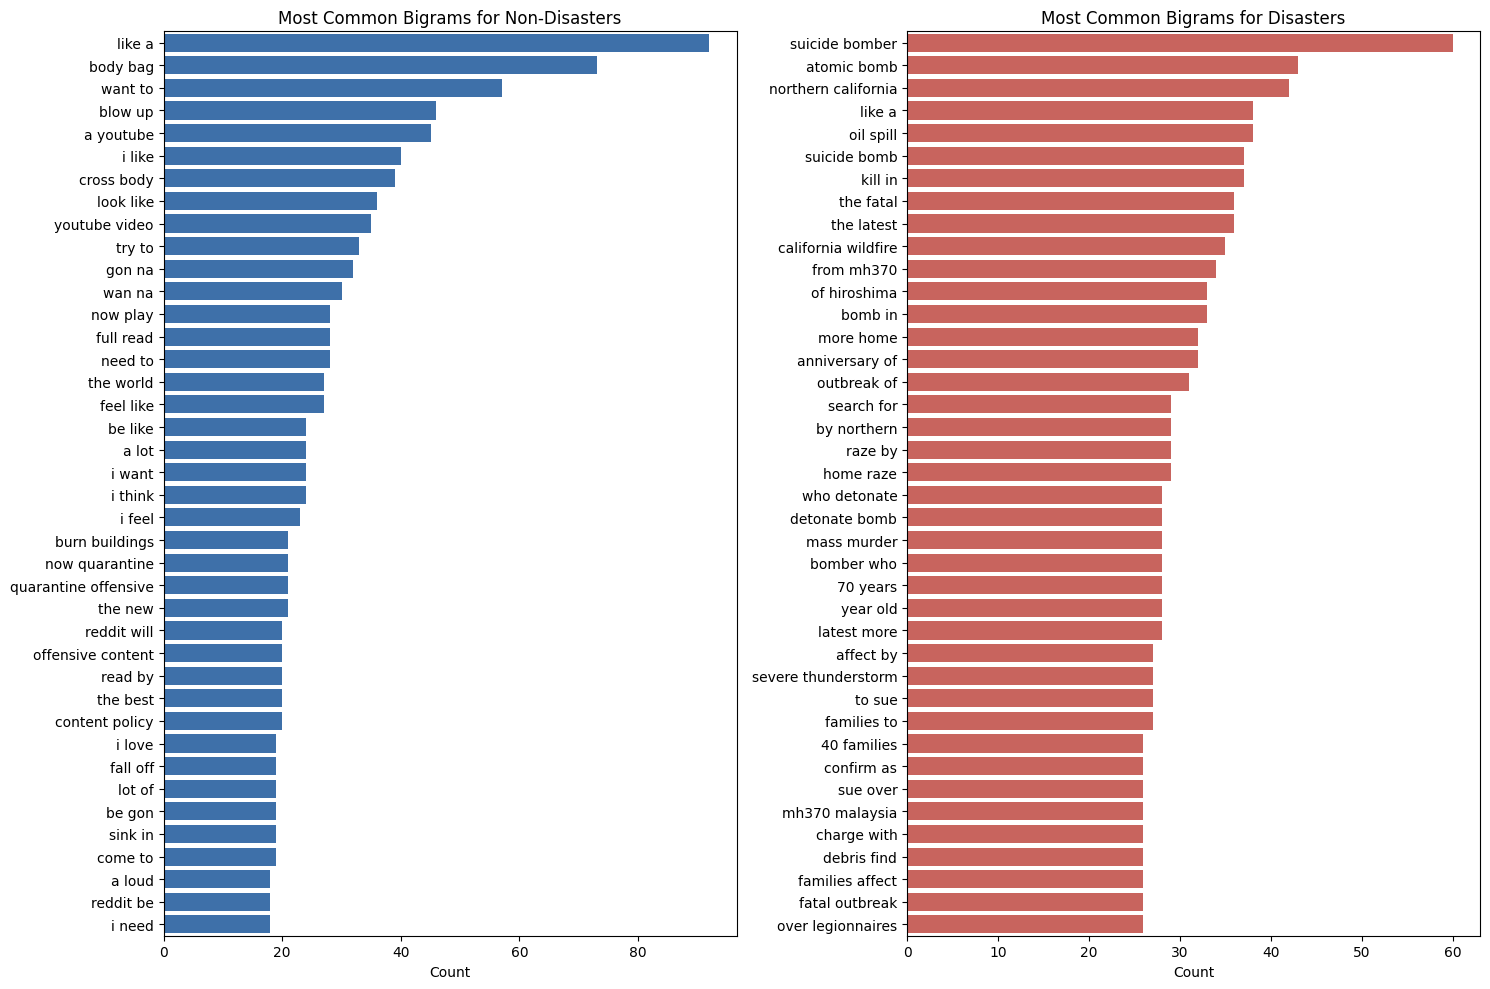

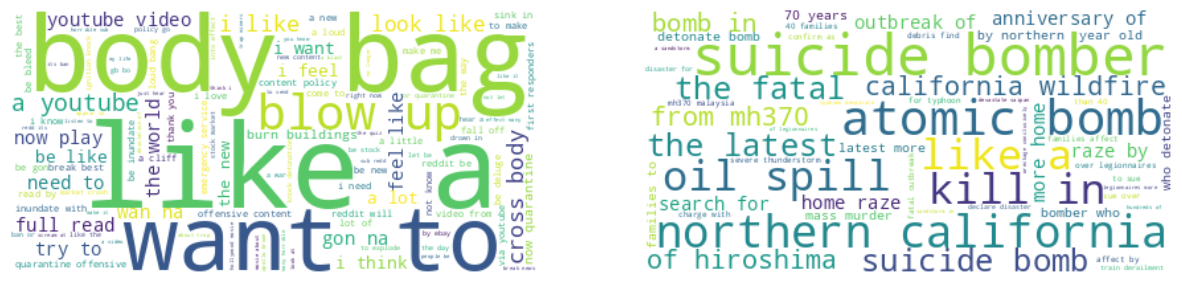

In [17]:
## Ngrams
from nltk.util import ngrams

def generate_ngrams(text, n):
    words = word_tokenize(text)
    return [' '.join(ngram) for ngram in list(get_data(ngrams(words, n))) if not all(w in stop for w in ngram)] # exclude if all are stopwords


# in newer versions of python, raising StopIteration exception to end a generator, which is used in ngram, is deprecated
def get_data(gen):
    try:
        for elem in gen:
            yield elem
    except (RuntimeError, StopIteration):
        return
# Bigrams

bigrams_disaster = train[train.target==1].text.apply(lambda x: generate_ngrams(x, 2))
bigrams_ndisaster = train[train.target==0].text.apply(lambda x: generate_ngrams(x, 2))

bigrams_d_dict = {}
for bgs in bigrams_disaster:
    for bg in bgs:
        if bg in bigrams_d_dict:
            bigrams_d_dict[bg] += 1
        else:
            bigrams_d_dict[bg] = 1

bigrams_d_df = pd.DataFrame(bigrams_d_dict.items(), columns=['Bigrams','Count'])

bigrams_nd_dict = {}
for bgs in bigrams_ndisaster:
    for bg in bgs:
        if bg in bigrams_nd_dict:
            bigrams_nd_dict[bg] += 1
        else:
            bigrams_nd_dict[bg] = 1

bigrams_nd_df = pd.DataFrame(bigrams_nd_dict.items(), columns=['Bigrams','Count'])
# Barplots for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Bigrams',data=bigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Bigrams for Non-Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Bigrams',data=bigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Bigrams for Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()
# Woudcloud for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
my_cloud = WordCloud(background_color='white', stopwords=stop).generate_from_frequencies(bigrams_nd_dict)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1,2,2)
my_cloud = WordCloud(background_color='white', stopwords=stop).generate_from_frequencies(bigrams_d_dict)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

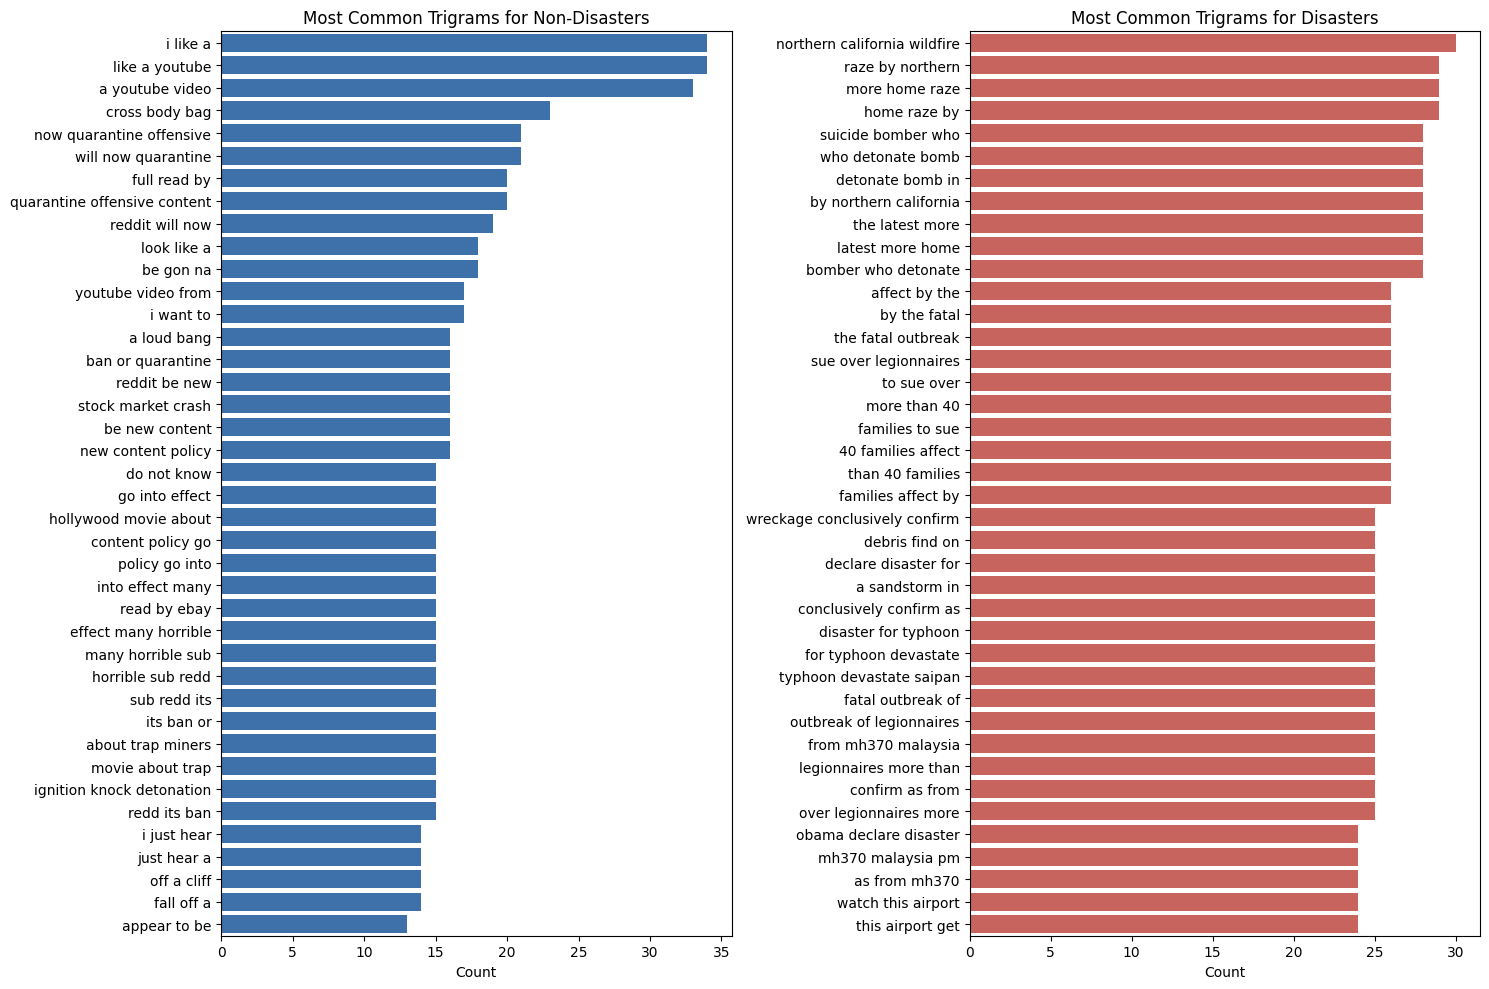

In [18]:
# Trigrams

trigrams_disaster = train[train.target==1].text.apply(lambda x: generate_ngrams(x, 3))
trigrams_ndisaster = train[train.target==0].text.apply(lambda x: generate_ngrams(x, 3))

trigrams_d_dict = {}
for tgs in trigrams_disaster:
    for tg in tgs:
        if tg in trigrams_d_dict:
            trigrams_d_dict[tg] += 1
        else:
            trigrams_d_dict[tg] = 1

trigrams_d_df = pd.DataFrame(trigrams_d_dict.items(), columns=['Trigrams','Count'])

trigrams_nd_dict = {}
for tgs in trigrams_ndisaster:
    for tg in tgs:
        if tg in trigrams_nd_dict:
            trigrams_nd_dict[tg] += 1
        else:
            trigrams_nd_dict[tg] = 1

trigrams_nd_df = pd.DataFrame(trigrams_nd_dict.items(), columns=['Trigrams','Count'])
# Barplots for trigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Trigrams',data=trigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Trigrams for Non-Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Trigrams',data=trigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Trigrams for Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

## Remove Stopwords
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    return ' '.join([w.lower() for w in word_tokens if not w.lower() in stop])

#tweets_tmp = tweets.copy()
train['text_nostopwords'] = train.text.apply(lambda x: remove_stopwords(x))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train.drop(['id','keyword','location','target'],axis=1), train[['target']], test_size=0.2, stratify=train[['target']], random_state=0)
X_train_text = X_train['text']
X_val_text = X_val['text']

print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)
print('Train Class Proportion:\n', y_train['target'].value_counts() / len(y_train) * 100)
print('\nValidation Class Proportion:\n', y_val['target'].value_counts() / len(y_val) * 100)


X_train shape:  (6090, 13)
X_val shape:  (1523, 13)
y_train shape:  (6090, 1)
y_val shape:  (1523, 1)
Train Class Proportion:
 target
0    57.027915
1    42.972085
Name: count, dtype: float64

Validation Class Proportion:
 target
0    57.058437
1    42.941563
Name: count, dtype: float64


In [22]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#

tokenizer_1 = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer_1.fit_on_texts(X_train_text)
X_train_text = tokenizer_1.texts_to_sequences(X_train_text)
X_val_text = tokenizer_1.texts_to_sequences(X_val_text)
print(X_train_text[:10])
print('')
print(X_val_text[:10])

tokenizer_1.sequences_to_texts([X_train_text[1]])

[[59, 2, 4, 33, 5, 3, 1, 88, 1128, 360, 20, 998, 18, 14, 18, 15, 1423], [1, 2342, 2343, 3622, 39, 122, 117, 2, 1314, 235, 299], [3623, 339, 1, 191, 1, 1047, 80, 105], [8, 126, 9, 2, 1, 55, 1315, 881, 5, 33, 1, 435, 40, 1048, 1, 26, 12, 4, 1424, 1, 1983, 244, 10, 75, 1, 179], [9, 1, 58, 3624, 2344, 1, 499, 20, 1, 8, 272, 149, 94, 113, 8, 163, 2345, 153, 2, 716, 150], [1, 255, 7, 3, 2806], [13, 3, 164, 7, 1, 1425, 175, 2807, 11, 607, 3625, 2808], [132, 6, 561, 65, 216, 49, 81, 562, 132, 389, 21, 3, 201, 370, 7, 216, 637, 563], [134, 564, 53, 181, 10, 82, 61, 1049, 23, 350, 2809, 176, 10, 42, 118], [717, 310, 199, 23, 202, 1739, 224, 11, 1984, 7, 68, 638]]

[[3, 270, 1712, 9, 97, 11, 37, 3, 209, 1341, 31, 12, 6, 177, 196, 54, 7, 17, 294, 165, 4, 1340, 4972, 4973, 622, 270, 234], [10, 2, 3, 527, 1, 377, 17, 63, 558, 353, 9, 2, 1, 1], [1, 923, 774, 626, 2137, 4013], [787, 73, 21, 861, 22, 3, 862, 816, 39, 297, 659, 741, 62, 1022, 1079], [535, 204, 39, 236, 47, 116, 233, 93, 1184, 19, 158, 4

['<UNK> fest announce refund after day two be extreme weather evacuation']

In [23]:
#Padding

print('Train Set Max Length:', max(len(text) for text in X_train_text))
maxlen = 50

X_train_text = pad_sequences(X_train_text, padding='post', maxlen=maxlen)
X_val_text = pad_sequences(X_val_text, padding='post', maxlen=maxlen)

print('X_train shape:', X_train_text.shape)
print('X_train shape:', X_val_text.shape)

Train Set Max Length: 34
X_train shape: (6090, 50)
X_train shape: (1523, 50)


In [26]:
import numpy as np
#Embeddings Matrix
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer_1.word_index) + 1

# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.twitter.27B.200d.txt',encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training set
embedding_matrix = np.zeros((vocab_size, 200))

for word, i in tokenizer_1.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print('Embedding Matrix Shape:', embedding_matrix.shape)

Loaded 31718 word vectors.
Embedding Matrix Shape: (12727, 200)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       2,545,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,545,400 (9.71 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,545,400 (9.71 MB)

None
Epoch 1/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - acc: 0.5688 - loss: 0.3294

48/48 ━━━━━━━━━━━━━━━━━━━━ 45s 655ms/step - acc: 0.5703 - loss: 0.3290 - val_acc: 0.7748 - val_loss: 0.5470
Epoch 2/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - acc: 0.7664 - loss: 0.2602

48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 656ms/step - acc: 0.7662 - loss: 0.2603 - val_acc: 0.7853 - val_loss: 0.5182
Epoch 3/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 579ms/step - acc: 0.7653 - loss: 0.2573 - val_acc: 0.7846 - val_loss: 0.4923
Epoch 4/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - acc: 0.7722 - loss: 0.2474

48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 578ms/step - acc: 0.7722 - loss: 0.2474 - val_acc: 0.7866 - val_loss: 0.4758
Epoch 5/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 43s 640ms/step - acc: 0.7718 - loss: 0.2429 - val_acc: 0.7866 - val_loss: 0.4753
Epoch 6/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - acc: 0.7727 - loss: 0.2406

48/48 ━━━━━━━━━━━━━━━━━━━━ 45s 730ms/step - acc: 0.7727 - loss: 0.2406 - val_acc: 0.7919 - val_loss: 0.4585
Epoch 7/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 581ms/step - acc: 0.7779 - loss: 0.2463 - val_acc: 0.7919 - val_loss: 0.4759
Epoch 8/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 43s 628ms/step - acc: 0.7830 - loss: 0.2407 - val_acc: 0.7866 - val_loss: 0.4951
Epoch 9/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - acc: 0.7816 - loss: 0.2304

48/48 ━━━━━━━━━━━━━━━━━━━━ 42s 646ms/step - acc: 0.7816 - loss: 0.2305 - val_acc: 0.7958 - val_loss: 0.4755
Epoch 10/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 40s 614ms/step - acc: 0.7943 - loss: 0.2268 - val_acc: 0.7938 - val_loss: 0.4631
Epoch 11/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - acc: 0.8035 - loss: 0.2187

48/48 ━━━━━━━━━━━━━━━━━━━━ 30s 630ms/step - acc: 0.8033 - loss: 0.2188 - val_acc: 0.8017 - val_loss: 0.4559
Epoch 12/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 43s 666ms/step - acc: 0.7974 - loss: 0.2203 - val_acc: 0.7951 - val_loss: 0.4776
Epoch 13/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 42s 685ms/step - acc: 0.8095 - loss: 0.2150 - val_acc: 0.7800 - val_loss: 0.4907
Epoch 14/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 657ms/step - acc: 0.8017 - loss: 0.2179 - val_acc: 0.7912 - val_loss: 0.4550
Epoch 15/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - acc: 0.8045 - loss: 0.2152

48/48 ━━━━━━━━━━━━━━━━━━━━ 38s 583ms/step - acc: 0.8046 - loss: 0.2152 - val_acc: 0.8063 - val_loss: 0.4458


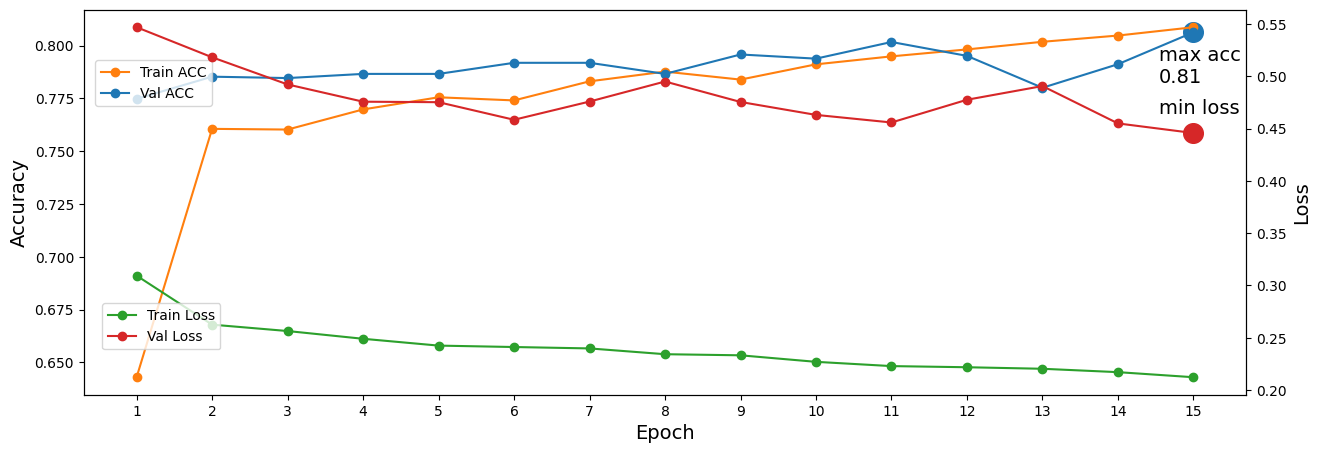

In [28]:
## Hyperparameters
num_epochs=15
dropout=0.2
recurrent_dropout=0.2
lr=0.0005
batch_size=128
class_weight = {0: y_train['target'].value_counts()[1]/len(y_train), 1: y_train['target'].value_counts()[0]/len(y_train)}


from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, LSTM
from keras.layers import Embedding
from keras import optimizers
from keras.callbacks import ModelCheckpoint

lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen, trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128, return_sequences=True, dropout=dropout, recurrent_dropout=recurrent_dropout)) # try adding dropout later
lstm_model.add(LSTM(128))

#model.add(Flatten())
lstm_model.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(learning_rate=lr)
lstm_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

# best hyperparameters
# num_epochs=15
# dropout=0.2
# recurrent_dropout=0.2
# lr=0.0005
# batch_size=128

def plot_model_performance(history):
    plt.figure(figsize=(15,5))
    plt.plot(range(num_epochs), history.history['acc'],'-o',
             label='Train ACC',color='#ff7f0e')
    plt.plot(range(num_epochs),history.history['val_acc'],'-o',
             label='Val ACC',color='#1f77b4')
    x = np.argmax( history.history['val_acc'] ); y = np.max( history.history['val_acc'] )
    xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x,y,s=200,color='#1f77b4')
    plt.text(x-0.03*xdist,y-0.13*ydist,'max acc\n%.2f'%y,size=14)
    plt.ylabel('Accuracy',size=14); plt.xlabel('Epoch',size=14)
    plt.legend(loc=(0.01,0.75))

    plt2 = plt.gca().twinx()
    plt2.plot(range(num_epochs),history.history['loss'],'-o',
              label='Train Loss',color='#2ca02c')
    plt2.plot(range(num_epochs),history.history['val_loss'],'-o',
              label='Val Loss',color='#d62728')
    x = np.argmin( history.history['val_loss'] ); y = np.min( history.history['val_loss'] )
    ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x,y,s=200,color='#d62728')
    plt.text(x-0.03*xdist,y+0.05*ydist,'min loss',size=14)
   # plt.ylim([-0.2, 2])
    plt.ylabel('Loss',size=14)
    plt.xticks(ticks=list(range(num_epochs)),labels=list(range(1, num_epochs+1)))
    plt.legend(loc='lower left', bbox_to_anchor=(0.01, 0.1))
    plt.show()

checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_acc', save_best_only=True)
history = lstm_model.fit(X_train_text, y_train, batch_size=batch_size, callbacks=[checkpoint], epochs=num_epochs,
                         class_weight=class_weight, validation_data=(X_val_text, y_val), verbose=1)
plot_model_performance(history)

In [29]:
# count number of characters in each tweet
test['char_len'] = test.text.str.len()

# count number of words in each tweet
word_tokens = [len(word_tokenize(var)) for var in test.text]
test['word_len'] = word_tokens

# count number of sentence in each tweet
sent_tokens = [len(sent_tokenize(var)) for var in test.text]
test['sent_len'] = sent_tokens
# polarity and subjectivity
test['polarity'] = [TextBlob(var).sentiment.polarity for var in test.text]
test['subjectivity'] = [TextBlob(var).sentiment.subjectivity for var in test.text]

# exclaimation and question marks
test['exclaimation_num'] = [var.count('!') for var in test.text]
test['questionmark_num'] = [var.count('?') for var in test.text]

# count number of hashtags and mentions
# Function for counting number of hashtags and mentions
def count_url_hashtag_mention(text):
    urls_num = len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
    word_tokens = text.split()
    hash_num = len([word for word in word_tokens if word[0] == '#' and word.count('#') == 1]) # only appears once in front of word
    mention_num = len([word for word in word_tokens if word[0] == '@' and word.count('@') == 1]) # only appears once in front of word
    return urls_num, hash_num, mention_num

url_num, hash_num, mention_num = zip(*[count_url_hashtag_mention(tweet) for tweet in test.text])
test = test.assign(url_num = url_num, hash_num = hash_num, mention_num = mention_num)

# count number of contractions
contractions = ["'t", "'re", "'s", "'d", "'ll", "'ve", "'m"]
test['contraction_num'] = [sum([tweet.count(cont) for cont in contractions]) for tweet in test.text]
## Replace NaNs with 'None'
test.keyword.fillna('None', inplace=True)

## Expand Contractions

# Function for expanding most common contractions https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

test.text = [decontraction(tweet) for tweet in test.text]

## Remove Emojis

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

print(remove_emoji("OMG there is a volcano eruption!!! 😭😱😷"))

test.text = test.text.apply(lambda x: remove_emoji(x))
## Remove URLs
test.text = test.text.apply(lambda x: remove_url(x))

# Remove Punctuations except '!?'

def remove_punct(text):
    new_punct = re.sub('\ |\!|\?', '', punctuation)
    table=str.maketrans('','',new_punct)
    return text.translate(table)

test.text = test.text.apply(lambda x: remove_punct(x))

## Replace amp
def replace_amp(text):
    text = re.sub(r" amp ", " and ", text)
    return text

test.text = test.text.apply(lambda x: replace_amp(x))

#Word Segmentation
from wordsegment import load, segment
load()

test.text = test.text.apply(lambda x: ' '.join(segment(x)))

#test = pd.read_csv('../input/twitter-logo/tweets_test_segmented.csv')
## Lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemma(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(w.lower(), pos='v') for w in words])

test.text = test.text.apply(lambda x: lemma(x))

# tokenization
test_text = test['text']
test_text = tokenizer_1.texts_to_sequences(test_text)

# padding
test_text = pad_sequences(test_text, padding='post', maxlen=50)
print('X_test shape:', test_text.shape)


<ipython-input-29-8ee7a9f26f37>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.keyword.fillna('None', inplace=True)


OMG there is a volcano eruption!!! 
X_test shape: (3263, 50)


In [30]:
# lstm prediction
#model.predict(test_text)
lstm_model.load_weights('lstm_model.h5')
submission = test.copy()[['id']]
predict_x= lstm_model.predict(test_text)
submission['target'] = np.argmax(predict_x,axis=1)
submission.to_csv('submission.csv', index=False)
display(submission.head())

102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
